## Regularization techniques : Dropout and Data Augmentation

***Earlier we had trained a model to classify horses or humans. But the validation accuaracy was low while the train accuracy was high.*** 

***Hence our model was suffering from a HIGH VARIANCE problem.***

We will try to solve it here, by using different Regularization techniques.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import RMSprop

Let's download 'Horses-or-Humans' dataset, and play with it.

In [0]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset

In [0]:
!unzip /content/horses-or-humans-dataset.zip

In [38]:
#getting reference to directory locations
train_horse_dir = os.path.join('/content/horse-or-human/train/horses')
train_human_dir = os.path.join('/content/horse-or-human/train/humans')
validation_horse_dir = os.path.join('/content/horse-or-human/validation/horses')
validation_human_dir = os.path.join('/content/horse-or-human/validation/humans')

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


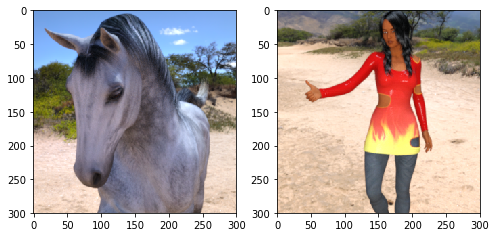

In [39]:
#Let's show some images
import matplotlib.image as mpimg

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

horse_img_path = os.path.join(train_horse_dir, os.listdir(train_horse_dir)[0])
horse_img = mpimg.imread(horse_img_path)

human_img_path = os.path.join(train_human_dir, os.listdir(train_human_dir)[18])
human_img = mpimg.imread(human_img_path)

plt.subplot(121)
plt.imshow(horse_img)
plt.subplot(122)
plt.imshow(human_img)

### Loading the images with ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory('/content/horse-or-human/train',   #source directory of training images
                                     target_size = (300, 300),    #resizing the images
                                     batch_size = 128,            #setting batch sizes to 128
                                     class_mode = 'binary')       #binary classification

val_generator = val_datagen.flow_from_directory('/content/horse-or-human/validation', #source directory of validation images
                                     target_size = (300, 300),
                                     batch_size = 32, 
                                     class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


There are a lot many [other preprocessing techniques](https://keras.io/preprocessing/image/), that can be done with ImageDataGenerator, apart from rescaling it, which I have used above.

### Regularization by Dropout
- First we will train a model without layers with dropout disabled.
- Then we will train another model with exact same hyperparams and structure, but with Dropout enabled.

Let's see the difference.

### Defining the model 

In [0]:
def create_model(dropout = False, dropout_rate =0.2):
    '''Training a deeper Neural Network never really hurts'''
    model = Sequential()
    #The first convolution    
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
    model.add(MaxPooling2D(2, 2))
    # The second convolution
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    # The third convolution
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    # The fourth convolution
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    # The fifth convolution
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    # Flatten the results to feed into a DNN
    model.add(Flatten())
    # 512 neuron hidden layer
    model.add(Dense(512, activation='relu'))
    if dropout:
        model.add(Dropout(dropout_rate))
    # 256 neuron hidden layer
    model.add(Dense(256, activation='relu'))
    if dropout:
        model.add(Dropout(dropout_rate))
    # Only 1 output neuron.
    model.add(Dense(1, activation='sigmoid'))
    
    
    model.compile(optimizer= RMSprop(lr=0.001), metrics=['accuracy'], 
                  loss='binary_crossentropy')
    
    return model

In [33]:
#model without dropout layers
model = create_model(dropout = False)

#since we are passing input from a generator
model.fit_generator(
        train_generator, 
        steps_per_epoch = 8,   #total number of batches to be ouput by generator before an epoch is said to finish
                               #In this case, 8*batch_size = 8 * 128 = 1024 (which is equal to number of training examples)
        epochs = 20, 
        verbose = 2, 
        validation_data = val_generator,
        validation_steps = 8)

Epoch 1/20
 - 10s - loss: 0.8938 - acc: 0.5791 - val_loss: 1.1785 - val_acc: 0.5625
Epoch 2/20
 - 7s - loss: 3.2146 - acc: 0.6638 - val_loss: 1.9540 - val_acc: 0.5000
Epoch 3/20
 - 7s - loss: 0.5560 - acc: 0.7818 - val_loss: 0.7110 - val_acc: 0.6914
Epoch 4/20
 - 7s - loss: 0.3336 - acc: 0.8651 - val_loss: 1.2933 - val_acc: 0.8164
Epoch 5/20
 - 7s - loss: 0.3234 - acc: 0.8701 - val_loss: 1.0972 - val_acc: 0.8164
Epoch 6/20
 - 7s - loss: 0.2227 - acc: 0.9236 - val_loss: 1.1444 - val_acc: 0.8047
Epoch 7/20
 - 7s - loss: 0.1941 - acc: 0.9093 - val_loss: 1.1186 - val_acc: 0.8047
Epoch 8/20
 - 7s - loss: 0.3664 - acc: 0.8602 - val_loss: 1.0912 - val_acc: 0.8164
Epoch 9/20
 - 7s - loss: 0.0733 - acc: 0.9742 - val_loss: 1.6373 - val_acc: 0.8047
Epoch 10/20
 - 8s - loss: 0.1962 - acc: 0.9336 - val_loss: 1.3114 - val_acc: 0.8203
Epoch 11/20
 - 7s - loss: 0.0284 - acc: 0.9931 - val_loss: 1.7750 - val_acc: 0.8047
Epoch 12/20
 - 7s - loss: 0.0703 - acc: 0.9782 - val_loss: 4.1145 - val_acc: 0.6523


Without Layers with Dropout :
- Training accuracy = 100
- Validation accuracy = 82.03
 
 This is some serious overfitting.

In [34]:
#model with dropout layers
model = create_model(dropout = True)

#since we are passing input from a generator
model.fit_generator(
        train_generator, 
        steps_per_epoch = 8,   #total number of batches to be ouput by generator before an epoch is said to finish
                               #In this case, 8*batch_size = 8 * 128 = 1024 (which is equal to number of training examples)
        epochs = 20, 
        verbose = 2, 
        validation_data = val_generator,
        validation_steps = 8)

Epoch 1/20
 - 9s - loss: 0.8522 - acc: 0.5632 - val_loss: 0.5939 - val_acc: 0.6094
Epoch 2/20
 - 7s - loss: 1.6359 - acc: 0.6618 - val_loss: 0.6393 - val_acc: 0.5625
Epoch 3/20
 - 7s - loss: 0.9458 - acc: 0.7491 - val_loss: 0.5517 - val_acc: 0.8047
Epoch 4/20
 - 7s - loss: 0.5521 - acc: 0.8359 - val_loss: 2.7504 - val_acc: 0.5312
Epoch 5/20
 - 7s - loss: 0.5099 - acc: 0.7908 - val_loss: 0.9618 - val_acc: 0.6562
Epoch 6/20
 - 7s - loss: 0.3314 - acc: 0.8969 - val_loss: 0.6854 - val_acc: 0.8477
Epoch 7/20
 - 7s - loss: 0.1947 - acc: 0.9346 - val_loss: 1.0454 - val_acc: 0.8008
Epoch 8/20
 - 7s - loss: 0.1612 - acc: 0.9162 - val_loss: 2.0581 - val_acc: 0.7617
Epoch 9/20
 - 8s - loss: 0.1278 - acc: 0.9492 - val_loss: 0.4692 - val_acc: 0.9180
Epoch 10/20
 - 7s - loss: 0.5784 - acc: 0.8468 - val_loss: 1.0666 - val_acc: 0.8203
Epoch 11/20
 - 7s - loss: 0.1630 - acc: 0.9222 - val_loss: 1.3657 - val_acc: 0.8242
Epoch 12/20
 - 7s - loss: 0.3735 - acc: 0.9202 - val_loss: 1.2848 - val_acc: 0.8125
E

Without Layers with Dropout :
- Training accuracy = 99.80
- Validation accuracy = 85.16

Comparitively better than the previous model on the validation dataset. But only comparitively, it is still having a high variance.

### Data Augmentation

It is the process in which we create extra training data from the available data.

Particularly useful where the training data is in form of images as they can
be flipped vertically or horizontally so as to create new training examples.

Here we will flip the training data horizontally.

### And we will do offline Data augmentation. 

In [53]:
train_generator_2 = train_datagen.flow_from_directory('/content/horse-or-human/train',   #source directory of training images
                                     target_size = (300, 300),
                                     batch_size = 1,  #getting images 1 by 1
                                     class_mode = 'binary')       #binary classification

Found 1027 images belonging to 2 classes.


In [0]:
X_train = np.zeros((2054,300,300,3))
Y_train = np.zeros(2054)

(2054, 300, 300, 3)
(2054,)


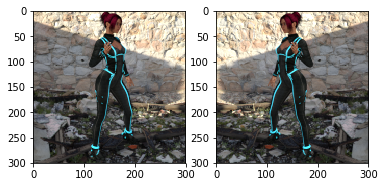

In [62]:
for i, (image, label)in enumerate(train_generator_2):
    X_train[i] = image[0]
    Y_train[i] = label
    X_train[i + 1027] = np.flip(image[0], axis = 1)
    Y_train[i + 1027] = label
    if i == 1026:
        break
        
print(X_train.shape)
print(Y_train.shape)

img, flipped_img = X_train[0], X_train[1027]
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(flipped_img)

In [0]:
train_datagen_2 = ImageDataGenerator()  #as rescaling have been already done, 
                                        #because train_datagen provided rescaled images
train_datagen_2.fit(X_train, seed = 0)
train_generator_2 = train_datagen_2.flow(X_train, Y_train, 
                                         batch_size = 128,
                                        seed = 0)

We are creating a new data generator, with random horizontal flip set to True.
The validation data generator remains the same. Thus importing the images as they are.

In [74]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc')>0.95 and logs.get('val_acc') > 0.90:
            print('Reached desired level of performance')
            self.model.stop_training = True

model_3 = create_model(dropout= True, dropout_rate = 0.4)

model_3.fit_generator(
          train_generator_2, 
          steps_per_epoch = 16, 
          epochs = 15,
          verbose = 1,
          validation_data = val_generator,
          validation_steps = 8, callbacks = [myCallBack()])

Epoch 1/15
16/16 [==============================] - 9s 566ms/step - loss: 0.6803 - acc: 0.5745 - val_loss: 0.5031 - val_acc: 0.7891
Epoch 2/15
16/16 [==============================] - 6s 401ms/step - loss: 0.7605 - acc: 0.7319 - val_loss: 0.4730 - val_acc: 0.8320
Epoch 3/15
16/16 [==============================] - 6s 402ms/step - loss: 0.4229 - acc: 0.8334 - val_loss: 1.2843 - val_acc: 0.6641
Epoch 4/15
16/16 [==============================] - 6s 399ms/step - loss: 0.2520 - acc: 0.9088 - val_loss: 4.3356 - val_acc: 0.5430
Epoch 5/15
16/16 [==============================] - 6s 398ms/step - loss: 0.1895 - acc: 0.9220 - val_loss: 2.3161 - val_acc: 0.7578
Epoch 6/15
16/16 [==============================] - 6s 399ms/step - loss: 0.2221 - acc: 0.9132 - val_loss: 1.3906 - val_acc: 0.8320
Epoch 7/15
16/16 [==============================] - 6s 396ms/step - loss: 0.1108 - acc: 0.9622 - val_loss: 1.5673 - val_acc: 0.8320
Epoch 8/15
16/16 [==============================] - 6s 400ms/step - loss: 0.

Training accuracy = 99.75

Validation accuracy = 93.36

Hence a combo of Data Augmentation and Higher Dropout rate, gives us a much better perfomance on the validation datset as well.